In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
# Loading the dataset
data = pd.read_csv('D:\TFM\dataset_multilanguage_train_test.csv')
# value count for each language
data["Language"].value_counts()
# separating the independent and dependant features
X = data["Text"]
y = data["Language"]
# converting categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
    # removing the symbols and numbers
#    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
#    text = re.sub(r'[[]]', ' ', text)
    # converting the text to lower case
#    text = text.lower()
    # appending to data_list
    data_list.append(text)
# creating bag of words using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
#train test splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
#model creation and prediction
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
# prediction 
y_pred = model.predict(x_test)
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# visualising the confusion matrix
#plt.figure(figsize=(15,10))
#sns.heatmap(cm, annot = True)
#plt.show()
# function for predicting language


In [8]:
def predict(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    return lang[0]


In [10]:
## Se lee el dataset y se genera un nuevo archivo con una columna andicional, con el resultado de la deteccion
## realizada por elastic search language detection.
import csv
from csv import reader
i = 1

##Archivo para almacenar resultados
outputFile = open('D:\TFM\dataset_multilanguage_bayesian_result.csv', 'w', encoding="utf8",newline='')
writer = csv.writer(outputFile)
writer.writerow(['Text', 'Language', 'LanguageDetected'])

# leer dataset
with open('D:\TFM\dataset_multilanguage.csv', 'r', encoding="utf8") as read_obj:
    csv_dict_reader = csv.DictReader(read_obj)
    for row in csv_dict_reader:
        if i > 5000:  ## usar los mismo 5000 textos usados con azure cognitive services
            break
        try: 
            print('Detectando texto ', i, '....')
            writer.writerow([row['Text'], row['language'], predict(row['Text'])])
        except Exception as err:
            ## si falla algo abortar
            print("Encountered exception. {}".format(err))
            break
        i = i +1
outputFile.close()
print('Finalizó proceso') 

Detectando texto  1 ....
Detectando texto  2 ....
Detectando texto  3 ....
Detectando texto  4 ....
Detectando texto  5 ....
Detectando texto  6 ....
Detectando texto  7 ....
Detectando texto  8 ....
Detectando texto  9 ....
Detectando texto  10 ....
Detectando texto  11 ....
Detectando texto  12 ....
Detectando texto  13 ....
Detectando texto  14 ....
Detectando texto  15 ....
Detectando texto  16 ....
Detectando texto  17 ....
Detectando texto  18 ....
Detectando texto  19 ....
Detectando texto  20 ....
Detectando texto  21 ....
Detectando texto  22 ....
Detectando texto  23 ....
Detectando texto  24 ....
Detectando texto  25 ....
Detectando texto  26 ....
Detectando texto  27 ....
Detectando texto  28 ....
Detectando texto  29 ....
Detectando texto  30 ....
Detectando texto  31 ....
Detectando texto  32 ....
Detectando texto  33 ....
Detectando texto  34 ....
Detectando texto  35 ....
Detectando texto  36 ....
Detectando texto  37 ....
Detectando texto  38 ....
Detectando texto  39 

Detectando texto  344 ....
Detectando texto  345 ....
Detectando texto  346 ....
Detectando texto  347 ....
Detectando texto  348 ....
Detectando texto  349 ....
Detectando texto  350 ....
Detectando texto  351 ....
Detectando texto  352 ....
Detectando texto  353 ....
Detectando texto  354 ....
Detectando texto  355 ....
Detectando texto  356 ....
Detectando texto  357 ....
Detectando texto  358 ....
Detectando texto  359 ....
Detectando texto  360 ....
Detectando texto  361 ....
Detectando texto  362 ....
Detectando texto  363 ....
Detectando texto  364 ....
Detectando texto  365 ....
Detectando texto  366 ....
Detectando texto  367 ....
Detectando texto  368 ....
Detectando texto  369 ....
Detectando texto  370 ....
Detectando texto  371 ....
Detectando texto  372 ....
Detectando texto  373 ....
Detectando texto  374 ....
Detectando texto  375 ....
Detectando texto  376 ....
Detectando texto  377 ....
Detectando texto  378 ....
Detectando texto  379 ....
Detectando texto  380 ....
D

Detectando texto  656 ....
Detectando texto  657 ....
Detectando texto  658 ....
Detectando texto  659 ....
Detectando texto  660 ....
Detectando texto  661 ....
Detectando texto  662 ....
Detectando texto  663 ....
Detectando texto  664 ....
Detectando texto  665 ....
Detectando texto  666 ....
Detectando texto  667 ....
Detectando texto  668 ....
Detectando texto  669 ....
Detectando texto  670 ....
Detectando texto  671 ....
Detectando texto  672 ....
Detectando texto  673 ....
Detectando texto  674 ....
Detectando texto  675 ....
Detectando texto  676 ....
Detectando texto  677 ....
Detectando texto  678 ....
Detectando texto  679 ....
Detectando texto  680 ....
Detectando texto  681 ....
Detectando texto  682 ....
Detectando texto  683 ....
Detectando texto  684 ....
Detectando texto  685 ....
Detectando texto  686 ....
Detectando texto  687 ....
Detectando texto  688 ....
Detectando texto  689 ....
Detectando texto  690 ....
Detectando texto  691 ....
Detectando texto  692 ....
D

Detectando texto  1000 ....
Detectando texto  1001 ....
Detectando texto  1002 ....
Detectando texto  1003 ....
Detectando texto  1004 ....
Detectando texto  1005 ....
Detectando texto  1006 ....
Detectando texto  1007 ....
Detectando texto  1008 ....
Detectando texto  1009 ....
Detectando texto  1010 ....
Detectando texto  1011 ....
Detectando texto  1012 ....
Detectando texto  1013 ....
Detectando texto  1014 ....
Detectando texto  1015 ....
Detectando texto  1016 ....
Detectando texto  1017 ....
Detectando texto  1018 ....
Detectando texto  1019 ....
Detectando texto  1020 ....
Detectando texto  1021 ....
Detectando texto  1022 ....
Detectando texto  1023 ....
Detectando texto  1024 ....
Detectando texto  1025 ....
Detectando texto  1026 ....
Detectando texto  1027 ....
Detectando texto  1028 ....
Detectando texto  1029 ....
Detectando texto  1030 ....
Detectando texto  1031 ....
Detectando texto  1032 ....
Detectando texto  1033 ....
Detectando texto  1034 ....
Detectando texto  10

Detectando texto  1304 ....
Detectando texto  1305 ....
Detectando texto  1306 ....
Detectando texto  1307 ....
Detectando texto  1308 ....
Detectando texto  1309 ....
Detectando texto  1310 ....
Detectando texto  1311 ....
Detectando texto  1312 ....
Detectando texto  1313 ....
Detectando texto  1314 ....
Detectando texto  1315 ....
Detectando texto  1316 ....
Detectando texto  1317 ....
Detectando texto  1318 ....
Detectando texto  1319 ....
Detectando texto  1320 ....
Detectando texto  1321 ....
Detectando texto  1322 ....
Detectando texto  1323 ....
Detectando texto  1324 ....
Detectando texto  1325 ....
Detectando texto  1326 ....
Detectando texto  1327 ....
Detectando texto  1328 ....
Detectando texto  1329 ....
Detectando texto  1330 ....
Detectando texto  1331 ....
Detectando texto  1332 ....
Detectando texto  1333 ....
Detectando texto  1334 ....
Detectando texto  1335 ....
Detectando texto  1336 ....
Detectando texto  1337 ....
Detectando texto  1338 ....
Detectando texto  13

Detectando texto  1618 ....
Detectando texto  1619 ....
Detectando texto  1620 ....
Detectando texto  1621 ....
Detectando texto  1622 ....
Detectando texto  1623 ....
Detectando texto  1624 ....
Detectando texto  1625 ....
Detectando texto  1626 ....
Detectando texto  1627 ....
Detectando texto  1628 ....
Detectando texto  1629 ....
Detectando texto  1630 ....
Detectando texto  1631 ....
Detectando texto  1632 ....
Detectando texto  1633 ....
Detectando texto  1634 ....
Detectando texto  1635 ....
Detectando texto  1636 ....
Detectando texto  1637 ....
Detectando texto  1638 ....
Detectando texto  1639 ....
Detectando texto  1640 ....
Detectando texto  1641 ....
Detectando texto  1642 ....
Detectando texto  1643 ....
Detectando texto  1644 ....
Detectando texto  1645 ....
Detectando texto  1646 ....
Detectando texto  1647 ....
Detectando texto  1648 ....
Detectando texto  1649 ....
Detectando texto  1650 ....
Detectando texto  1651 ....
Detectando texto  1652 ....
Detectando texto  16

Detectando texto  1957 ....
Detectando texto  1958 ....
Detectando texto  1959 ....
Detectando texto  1960 ....
Detectando texto  1961 ....
Detectando texto  1962 ....
Detectando texto  1963 ....
Detectando texto  1964 ....
Detectando texto  1965 ....
Detectando texto  1966 ....
Detectando texto  1967 ....
Detectando texto  1968 ....
Detectando texto  1969 ....
Detectando texto  1970 ....
Detectando texto  1971 ....
Detectando texto  1972 ....
Detectando texto  1973 ....
Detectando texto  1974 ....
Detectando texto  1975 ....
Detectando texto  1976 ....
Detectando texto  1977 ....
Detectando texto  1978 ....
Detectando texto  1979 ....
Detectando texto  1980 ....
Detectando texto  1981 ....
Detectando texto  1982 ....
Detectando texto  1983 ....
Detectando texto  1984 ....
Detectando texto  1985 ....
Detectando texto  1986 ....
Detectando texto  1987 ....
Detectando texto  1988 ....
Detectando texto  1989 ....
Detectando texto  1990 ....
Detectando texto  1991 ....
Detectando texto  19

Detectando texto  2266 ....
Detectando texto  2267 ....
Detectando texto  2268 ....
Detectando texto  2269 ....
Detectando texto  2270 ....
Detectando texto  2271 ....
Detectando texto  2272 ....
Detectando texto  2273 ....
Detectando texto  2274 ....
Detectando texto  2275 ....
Detectando texto  2276 ....
Detectando texto  2277 ....
Detectando texto  2278 ....
Detectando texto  2279 ....
Detectando texto  2280 ....
Detectando texto  2281 ....
Detectando texto  2282 ....
Detectando texto  2283 ....
Detectando texto  2284 ....
Detectando texto  2285 ....
Detectando texto  2286 ....
Detectando texto  2287 ....
Detectando texto  2288 ....
Detectando texto  2289 ....
Detectando texto  2290 ....
Detectando texto  2291 ....
Detectando texto  2292 ....
Detectando texto  2293 ....
Detectando texto  2294 ....
Detectando texto  2295 ....
Detectando texto  2296 ....
Detectando texto  2297 ....
Detectando texto  2298 ....
Detectando texto  2299 ....
Detectando texto  2300 ....
Detectando texto  23

Detectando texto  2604 ....
Detectando texto  2605 ....
Detectando texto  2606 ....
Detectando texto  2607 ....
Detectando texto  2608 ....
Detectando texto  2609 ....
Detectando texto  2610 ....
Detectando texto  2611 ....
Detectando texto  2612 ....
Detectando texto  2613 ....
Detectando texto  2614 ....
Detectando texto  2615 ....
Detectando texto  2616 ....
Detectando texto  2617 ....
Detectando texto  2618 ....
Detectando texto  2619 ....
Detectando texto  2620 ....
Detectando texto  2621 ....
Detectando texto  2622 ....
Detectando texto  2623 ....
Detectando texto  2624 ....
Detectando texto  2625 ....
Detectando texto  2626 ....
Detectando texto  2627 ....
Detectando texto  2628 ....
Detectando texto  2629 ....
Detectando texto  2630 ....
Detectando texto  2631 ....
Detectando texto  2632 ....
Detectando texto  2633 ....
Detectando texto  2634 ....
Detectando texto  2635 ....
Detectando texto  2636 ....
Detectando texto  2637 ....
Detectando texto  2638 ....
Detectando texto  26

Detectando texto  2910 ....
Detectando texto  2911 ....
Detectando texto  2912 ....
Detectando texto  2913 ....
Detectando texto  2914 ....
Detectando texto  2915 ....
Detectando texto  2916 ....
Detectando texto  2917 ....
Detectando texto  2918 ....
Detectando texto  2919 ....
Detectando texto  2920 ....
Detectando texto  2921 ....
Detectando texto  2922 ....
Detectando texto  2923 ....
Detectando texto  2924 ....
Detectando texto  2925 ....
Detectando texto  2926 ....
Detectando texto  2927 ....
Detectando texto  2928 ....
Detectando texto  2929 ....
Detectando texto  2930 ....
Detectando texto  2931 ....
Detectando texto  2932 ....
Detectando texto  2933 ....
Detectando texto  2934 ....
Detectando texto  2935 ....
Detectando texto  2936 ....
Detectando texto  2937 ....
Detectando texto  2938 ....
Detectando texto  2939 ....
Detectando texto  2940 ....
Detectando texto  2941 ....
Detectando texto  2942 ....
Detectando texto  2943 ....
Detectando texto  2944 ....
Detectando texto  29

Detectando texto  3216 ....
Detectando texto  3217 ....
Detectando texto  3218 ....
Detectando texto  3219 ....
Detectando texto  3220 ....
Detectando texto  3221 ....
Detectando texto  3222 ....
Detectando texto  3223 ....
Detectando texto  3224 ....
Detectando texto  3225 ....
Detectando texto  3226 ....
Detectando texto  3227 ....
Detectando texto  3228 ....
Detectando texto  3229 ....
Detectando texto  3230 ....
Detectando texto  3231 ....
Detectando texto  3232 ....
Detectando texto  3233 ....
Detectando texto  3234 ....
Detectando texto  3235 ....
Detectando texto  3236 ....
Detectando texto  3237 ....
Detectando texto  3238 ....
Detectando texto  3239 ....
Detectando texto  3240 ....
Detectando texto  3241 ....
Detectando texto  3242 ....
Detectando texto  3243 ....
Detectando texto  3244 ....
Detectando texto  3245 ....
Detectando texto  3246 ....
Detectando texto  3247 ....
Detectando texto  3248 ....
Detectando texto  3249 ....
Detectando texto  3250 ....
Detectando texto  32

Detectando texto  3548 ....
Detectando texto  3549 ....
Detectando texto  3550 ....
Detectando texto  3551 ....
Detectando texto  3552 ....
Detectando texto  3553 ....
Detectando texto  3554 ....
Detectando texto  3555 ....
Detectando texto  3556 ....
Detectando texto  3557 ....
Detectando texto  3558 ....
Detectando texto  3559 ....
Detectando texto  3560 ....
Detectando texto  3561 ....
Detectando texto  3562 ....
Detectando texto  3563 ....
Detectando texto  3564 ....
Detectando texto  3565 ....
Detectando texto  3566 ....
Detectando texto  3567 ....
Detectando texto  3568 ....
Detectando texto  3569 ....
Detectando texto  3570 ....
Detectando texto  3571 ....
Detectando texto  3572 ....
Detectando texto  3573 ....
Detectando texto  3574 ....
Detectando texto  3575 ....
Detectando texto  3576 ....
Detectando texto  3577 ....
Detectando texto  3578 ....
Detectando texto  3579 ....
Detectando texto  3580 ....
Detectando texto  3581 ....
Detectando texto  3582 ....
Detectando texto  35

Detectando texto  3876 ....
Detectando texto  3877 ....
Detectando texto  3878 ....
Detectando texto  3879 ....
Detectando texto  3880 ....
Detectando texto  3881 ....
Detectando texto  3882 ....
Detectando texto  3883 ....
Detectando texto  3884 ....
Detectando texto  3885 ....
Detectando texto  3886 ....
Detectando texto  3887 ....
Detectando texto  3888 ....
Detectando texto  3889 ....
Detectando texto  3890 ....
Detectando texto  3891 ....
Detectando texto  3892 ....
Detectando texto  3893 ....
Detectando texto  3894 ....
Detectando texto  3895 ....
Detectando texto  3896 ....
Detectando texto  3897 ....
Detectando texto  3898 ....
Detectando texto  3899 ....
Detectando texto  3900 ....
Detectando texto  3901 ....
Detectando texto  3902 ....
Detectando texto  3903 ....
Detectando texto  3904 ....
Detectando texto  3905 ....
Detectando texto  3906 ....
Detectando texto  3907 ....
Detectando texto  3908 ....
Detectando texto  3909 ....
Detectando texto  3910 ....
Detectando texto  39

Detectando texto  4204 ....
Detectando texto  4205 ....
Detectando texto  4206 ....
Detectando texto  4207 ....
Detectando texto  4208 ....
Detectando texto  4209 ....
Detectando texto  4210 ....
Detectando texto  4211 ....
Detectando texto  4212 ....
Detectando texto  4213 ....
Detectando texto  4214 ....
Detectando texto  4215 ....
Detectando texto  4216 ....
Detectando texto  4217 ....
Detectando texto  4218 ....
Detectando texto  4219 ....
Detectando texto  4220 ....
Detectando texto  4221 ....
Detectando texto  4222 ....
Detectando texto  4223 ....
Detectando texto  4224 ....
Detectando texto  4225 ....
Detectando texto  4226 ....
Detectando texto  4227 ....
Detectando texto  4228 ....
Detectando texto  4229 ....
Detectando texto  4230 ....
Detectando texto  4231 ....
Detectando texto  4232 ....
Detectando texto  4233 ....
Detectando texto  4234 ....
Detectando texto  4235 ....
Detectando texto  4236 ....
Detectando texto  4237 ....
Detectando texto  4238 ....
Detectando texto  42

Detectando texto  4503 ....
Detectando texto  4504 ....
Detectando texto  4505 ....
Detectando texto  4506 ....
Detectando texto  4507 ....
Detectando texto  4508 ....
Detectando texto  4509 ....
Detectando texto  4510 ....
Detectando texto  4511 ....
Detectando texto  4512 ....
Detectando texto  4513 ....
Detectando texto  4514 ....
Detectando texto  4515 ....
Detectando texto  4516 ....
Detectando texto  4517 ....
Detectando texto  4518 ....
Detectando texto  4519 ....
Detectando texto  4520 ....
Detectando texto  4521 ....
Detectando texto  4522 ....
Detectando texto  4523 ....
Detectando texto  4524 ....
Detectando texto  4525 ....
Detectando texto  4526 ....
Detectando texto  4527 ....
Detectando texto  4528 ....
Detectando texto  4529 ....
Detectando texto  4530 ....
Detectando texto  4531 ....
Detectando texto  4532 ....
Detectando texto  4533 ....
Detectando texto  4534 ....
Detectando texto  4535 ....
Detectando texto  4536 ....
Detectando texto  4537 ....
Detectando texto  45

Detectando texto  4813 ....
Detectando texto  4814 ....
Detectando texto  4815 ....
Detectando texto  4816 ....
Detectando texto  4817 ....
Detectando texto  4818 ....
Detectando texto  4819 ....
Detectando texto  4820 ....
Detectando texto  4821 ....
Detectando texto  4822 ....
Detectando texto  4823 ....
Detectando texto  4824 ....
Detectando texto  4825 ....
Detectando texto  4826 ....
Detectando texto  4827 ....
Detectando texto  4828 ....
Detectando texto  4829 ....
Detectando texto  4830 ....
Detectando texto  4831 ....
Detectando texto  4832 ....
Detectando texto  4833 ....
Detectando texto  4834 ....
Detectando texto  4835 ....
Detectando texto  4836 ....
Detectando texto  4837 ....
Detectando texto  4838 ....
Detectando texto  4839 ....
Detectando texto  4840 ....
Detectando texto  4841 ....
Detectando texto  4842 ....
Detectando texto  4843 ....
Detectando texto  4844 ....
Detectando texto  4845 ....
Detectando texto  4846 ....
Detectando texto  4847 ....
Detectando texto  48

In [12]:
import pandas as pd
import numpy as np
results  = pd.read_csv('D:\TFM\dataset_multilanguage_bayesian_result.csv')
results['Compare'] = np.select([results ['Language'] != results ['LanguageDetected']], ['Different'], 'Same ')
results = results.drop(['Text'], axis=1)
countT = results.groupby(['Language','Compare']).size().reset_index(name="count")
results = results[results.Compare == 'Different']
print(results)
results.head(15)

       Language LanguageDetected    Compare
1       Swedish          English  Different
9      Japanese          Chinese  Different
18    Portugese          English  Different
42        Latin          English  Different
45     Japanese             Urdu  Different
...         ...              ...        ...
4911   Japanese             Urdu  Different
4922   Romanian          English  Different
4948   Japanese             Urdu  Different
4972   Japanese             Urdu  Different
4994    Chinese             Urdu  Different

[324 rows x 3 columns]


,Language,LanguageDetected,Compare
1,Swedish,English,Different
9,Japanese,Chinese,Different
18,Portugese,English,Different
42,Latin,English,Different
45,Japanese,Urdu,Different
66,Thai,English,Different
83,Korean,English,Different
100,Japanese,French,Different
123,Japanese,Urdu,Different
170,Japanese,Swedish,Different


In [13]:
count = results.groupby(['Language']).size().reset_index(name="count")
count = count.sort_values('count',ascending=True)
countT['countT'] = countT['count'].groupby(countT['Language']).transform('sum')
countT = countT[countT.Compare == 'Different']
countT = countT.sort_values('count',ascending=True)

#Formatear el dataframe en formato html
from IPython.core.display import HTML
HTML(countT.to_html(classes='table table-stripped'))


,Language,Compare,count,countT
0,Arabic,Different,1,236
36,Tamil,Different,1,240
6,English,Different,1,223
34,Swedish,Different,1,226
38,Thai,Different,2,219
10,French,Different,2,226
22,Persian,Different,2,239
32,Spanish,Different,3,217
30,Russian,Different,3,250
42,Urdu,Different,3,219


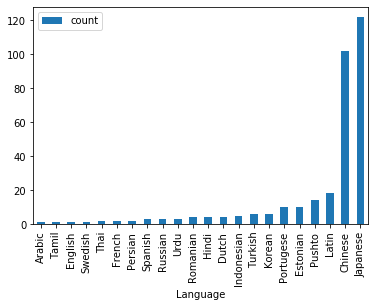

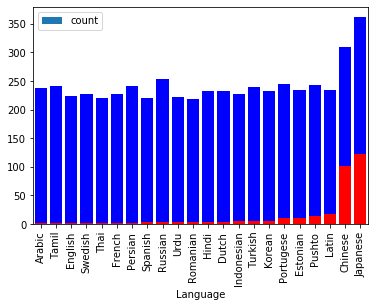

In [14]:
import matplotlib.pyplot as plt
axT = countT.plot.bar(x='Language', y='count', rot=90)
ax = count.plot.bar(x='Language', y='count', rot=90)

plt.bar(countT['Language'], countT['count'], color='r')
plt.bar(countT['Language'],countT['countT'], bottom=countT['count'], color='b')
plt.xticks(rotation=90)
plt.show()